# 2 Data Wrangling

## 2.1 Introduction
In this notebook, I am going to do data wrangling of air quality data. This timeseries dataset includes real and sensor concentrations of polutants in the air including CO, NO2,NOX, Non Methanic Hydrocarbons, Benzene and O3. The temperature, humidity and relative humidity is also recorded.

The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device.
The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons,Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. 

The main goal is to understand dataset better and clean it when it's applicable.

## 2.2 Imports

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## 2.3 Objectives¶
There are some fundamental questions to resolve in this notebook before moving on.

* What is the target value?
* Do we have potentially useful features?
* Do we have any fundamental issues with the data?


## 2.4 Load the data

In [2]:
# Load dataset
df=pd.read_csv('AirQualityUCI 2.csv')

In [3]:
df.head()

,Date,Time,CO_GT,PT08_S1_CO,NMHC_GT,C6H6_GT,PT08_S2_NMHC,Nox_GT,PT08_S3_Nox,NO2_GT,PT08_S4_NO2,PT08_S5_O3,T,RH,AH,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          9357 non-null   object 
 1   Time          9357 non-null   object 
 2   CO_GT         9357 non-null   float64
 3   PT08_S1_CO    9357 non-null   int64  
 4   NMHC_GT       9357 non-null   int64  
 5   C6H6_GT       9357 non-null   float64
 6   PT08_S2_NMHC  9357 non-null   int64  
 7   Nox_GT        9357 non-null   int64  
 8   PT08_S3_Nox   9357 non-null   int64  
 9   NO2_GT        9357 non-null   int64  
 10  PT08_S4_NO2   9357 non-null   int64  
 11  PT08_S5_O3    9357 non-null   int64  
 12  T             9357 non-null   float64
 13  RH            9357 non-null   float64
 14  AH            9357 non-null   float64
 15  CO_level      9357 non-null   object 
dtypes: float64(5), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
# Column names
df.columns

Index(['Date', 'Time', 'CO_GT', 'PT08_S1_CO', 'NMHC_GT', 'C6H6_GT',
       'PT08_S2_NMHC', 'Nox_GT', 'PT08_S3_Nox', 'NO2_GT', 'PT08_S4_NO2',
       'PT08_S5_O3', 'T', 'RH', 'AH', 'CO_level'],
      dtype='object')

## 2.5 Replace columns names

In [6]:
#Renaming Columns
df = df.rename(columns={'CO_GT': 'CO_Real', 'PT08_S1_CO': 'CO_Sensor','NMHC_GT':'Non Metanic Hydrocarbons_Real',
                        'C6H6_GT': 'Benzene_Real','PT08_S2_NMHC':'Non Metanic Hydrocarbons_Sensor','Nox_GT':'NOX_Real'})

In [7]:
#Renaming Columns
df = df.rename(columns={'PT08_S3_Nox': 'NOX_Sensor', 'NO2_GT': 'NO2_Real','PT08_S4_NO2':'NO2_Sensor',
                        'PT08_S5_O3': 'O3_Sensor','RH':'Relative Humidity','AH':'Absolute Humidity','T':'Temperature'})

In [8]:
df.columns

Index(['Date', 'Time', 'CO_Real', 'CO_Sensor', 'Non Metanic Hydrocarbons_Real',
       'Benzene_Real', 'Non Metanic Hydrocarbons_Sensor', 'NOX_Real',
       'NOX_Sensor', 'NO2_Real', 'NO2_Sensor', 'O3_Sensor', 'Temperature',
       'Relative Humidity', 'Absolute Humidity', 'CO_level'],
      dtype='object')

In [9]:
df.head()

,Date,Time,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity,CO_level
0,11/23/2004,19:00:00,11.9,2008,-200,50.6,1980,1389,325,220,2562,2342,12.4,74.7,1.0741,Very High
1,11/23/2004,20:00:00,11.5,1918,-200,49.4,1958,1358,335,190,2477,2237,11.5,76.2,1.0324,Very High
2,11/17/2004,18:00:00,10.2,1802,-200,47.7,1924,748,356,192,2235,2452,13.7,52.8,0.8244,Very High
3,11/23/2004,18:00:00,10.2,1982,-200,49.5,1959,1369,322,227,2536,2386,13.2,72.6,1.0936,Very High
4,11/26/2004,18:00:00,10.1,1956,-200,45.2,1877,1389,347,255,2338,2465,15.5,62.8,1.0979,Very High


## 2.6 Handling missing values

In [10]:
# Replace invalid values with NAN
df.replace(-200, np.nan, inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Date                             9357 non-null   object 
 1   Time                             9357 non-null   object 
 2   CO_Real                          7674 non-null   float64
 3   CO_Sensor                        8991 non-null   float64
 4   Non Metanic Hydrocarbons_Real    914 non-null    float64
 5   Benzene_Real                     8991 non-null   float64
 6   Non Metanic Hydrocarbons_Sensor  8991 non-null   float64
 7   NOX_Real                         7718 non-null   float64
 8   NOX_Sensor                       8991 non-null   float64
 9   NO2_Real                         7715 non-null   float64
 10  NO2_Sensor                       8991 non-null   float64
 11  O3_Sensor                        8991 non-null   float64
 12  Temperature         

In [12]:
#Calculate missing values in each column and the precentage of missing values in each column
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%')

,count,%
Date,0,0.000000
Time,0,0.000000
CO_level,0,0.000000
CO_Sensor,366,3.911510
Benzene_Real,366,3.911510
Non Metanic Hydrocarbons_Sensor,366,3.911510
NOX_Sensor,366,3.911510
NO2_Sensor,366,3.911510
O3_Sensor,366,3.911510
Temperature,366,3.911510


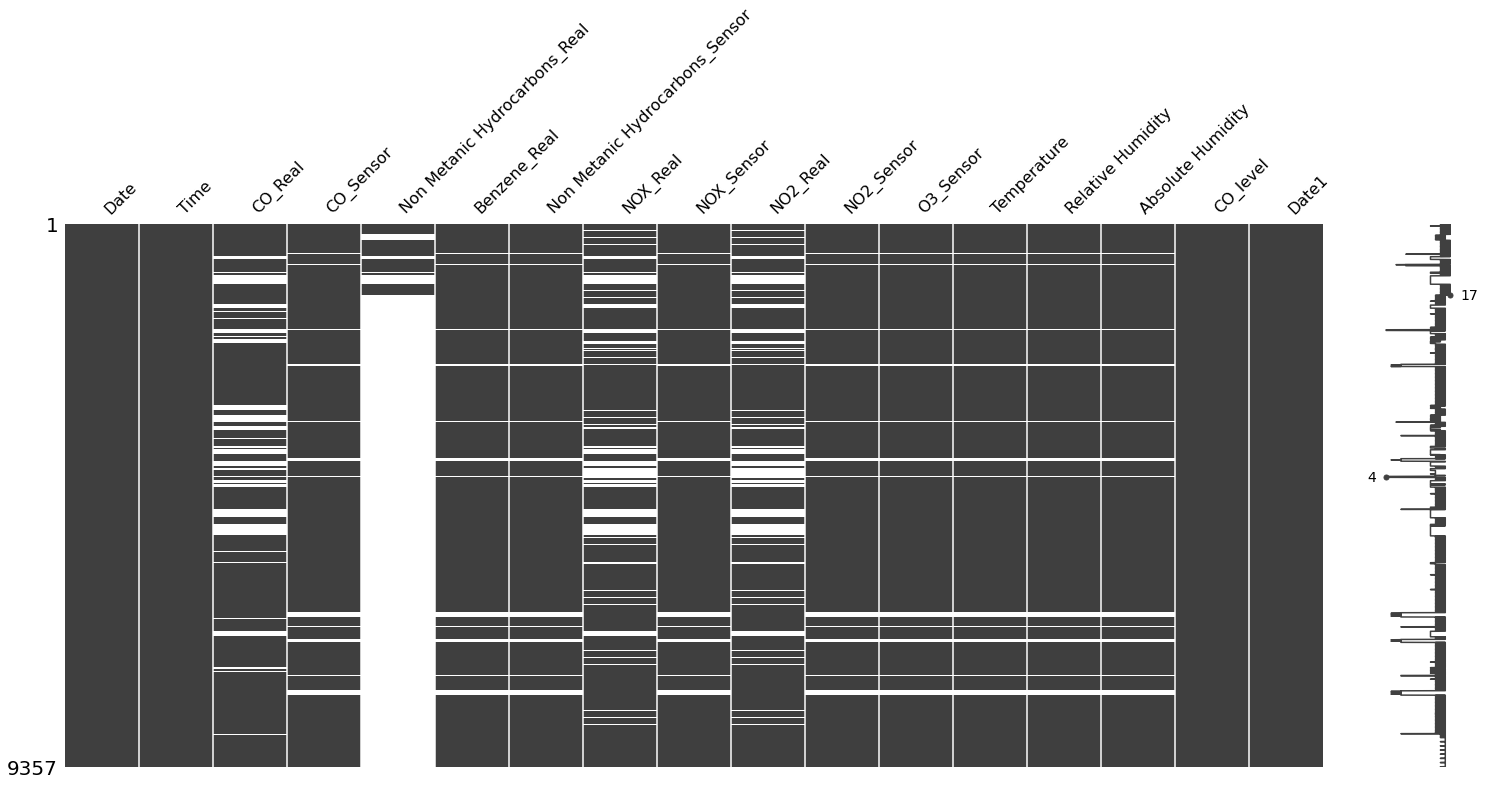

In [13]:
df.loc[:,'Date1'] = pd.to_datetime(df.Date.astype(str)+' '+df.Time.astype(str))
import missingno as msno
%matplotlib inline
msno.matrix(df.sort_values(by='Date1'));


* Real data for non-methanic haydrocarbons have 90% missing values. Also, real CO, NO2, NOX have 17% missing values. 
* After sorting the data by datetime, the heatmap was plotted to show where missing values happened. It seems the sensor data are all moving together. Also, when we don't have temperature and humidity data, we also don't have sensor data. 
* The missing values in real data for NOX and NO2 are also moving together. 
* For non-methanic hydrocarbons real data, it seems they stopeed to measure it at early points.

Do we have any duplicates?

In [14]:
#Finding Duplicate values in the dataframe
df[df.duplicated()]

,Date,Time,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity,CO_level,Date1


In [15]:
# combining data and time and set index to datetime
df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,Time,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity,CO_level,Date1
0,2004-11-23,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High,2004-11-23 19:00:00
1,2004-11-23,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High,2004-11-23 20:00:00
2,2004-11-17,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High,2004-11-17 18:00:00
3,2004-11-23,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High,2004-11-23 18:00:00
4,2004-11-26,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High,2004-11-26 18:00:00


## 2.7 Data Distributions

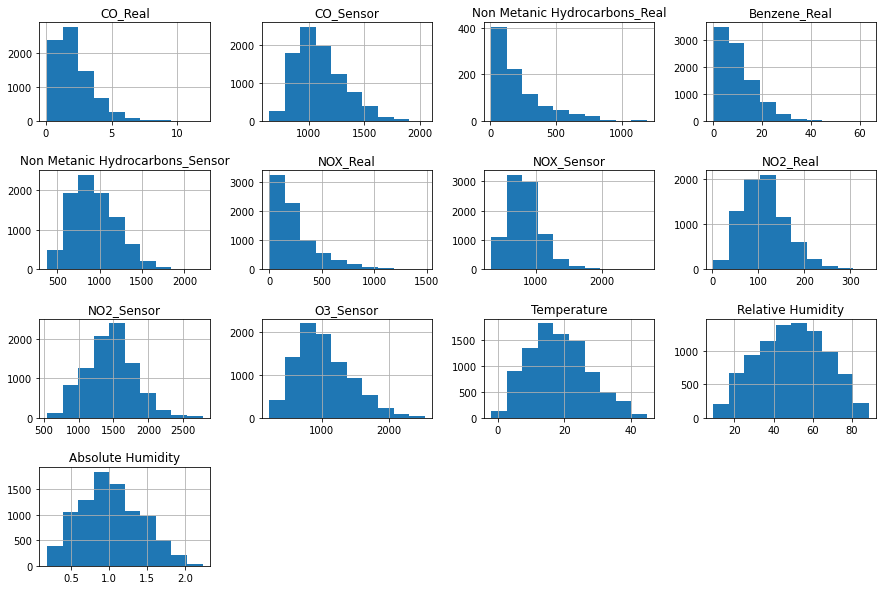

In [16]:
#Making histograms to see the data trends
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Most of real data (CO, Non Methanic Hydrocarbons, Benzene and NOx) seems to be skewed to the right. That could be because of nature of data.

In [17]:
df.describe()

,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity
count,7674.000000,8991.000000,914.000000,8991.000000,8991.000000,7718.000000,8991.000000,7715.000000,8991.000000,8991.000000,8991.000000,8991.000000,8991.000000
mean,2.152750,1099.833166,218.811816,10.083105,939.153376,246.896735,835.493605,113.091251,1456.264598,1022.906128,18.317829,49.234201,1.025530
std,1.453252,217.080037,204.459921,7.449820,266.831429,212.979168,256.817320,48.370108,346.206794,398.484288,8.832116,17.316892,0.403813
min,0.100000,647.000000,7.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,1.100000,937.000000,67.000000,4.400000,734.500000,98.000000,658.000000,78.000000,1227.000000,731.500000,11.800000,35.800000,0.736800
50%,1.800000,1063.000000,150.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400
75%,2.900000,1231.000000,297.000000,14.000000,1116.000000,326.000000,969.500000,142.000000,1674.000000,1273.500000,24.400000,62.500000,1.313700
max,11.900000,2040.000000,1189.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


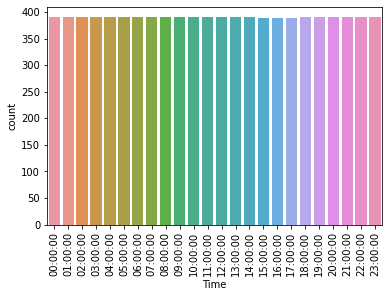

In [18]:
# Explore Time data
df1 = pd.to_datetime(df['Time']).dt.time

sns.countplot(df1.sort_values())
plt.xticks(rotation=90);


The Time data shows we have same amount of data every hour of day.

## 2.8 Exploring categorical variables

Based on data describe and histogram, non of the data seems unrealistic.

In [19]:
# Explore CO-level data
df['CO_level'].value_counts()

High         5801
Very low     1683
Low          1556
Moderate      305
Very High      12
Name: CO_level, dtype: int64

In [20]:
df[df['CO_level']=='Very High']

,Date,Time,CO_Real,CO_Sensor,Non Metanic Hydrocarbons_Real,Benzene_Real,Non Metanic Hydrocarbons_Sensor,NOX_Real,NOX_Sensor,NO2_Real,NO2_Sensor,O3_Sensor,Temperature,Relative Humidity,Absolute Humidity,CO_level,Date1
0,2004-11-23,19:00:00,11.9,2008.0,NaN,50.6,1980.0,1389.0,325.0,220.0,2562.0,2342.0,12.4,74.7,1.0741,Very High,2004-11-23 19:00:00
1,2004-11-23,20:00:00,11.5,1918.0,NaN,49.4,1958.0,1358.0,335.0,190.0,2477.0,2237.0,11.5,76.2,1.0324,Very High,2004-11-23 20:00:00
2,2004-11-17,18:00:00,10.2,1802.0,NaN,47.7,1924.0,748.0,356.0,192.0,2235.0,2452.0,13.7,52.8,0.8244,Very High,2004-11-17 18:00:00
3,2004-11-23,18:00:00,10.2,1982.0,NaN,49.5,1959.0,1369.0,322.0,227.0,2536.0,2386.0,13.2,72.6,1.0936,Very High,2004-11-23 18:00:00
4,2004-11-26,18:00:00,10.1,1956.0,NaN,45.2,1877.0,1389.0,347.0,255.0,2338.0,2465.0,15.5,62.8,1.0979,Very High,2004-11-26 18:00:00
5,2004-12-13,18:00:00,9.9,1881.0,NaN,50.8,1983.0,1479.0,334.0,269.0,2271.0,2523.0,12.6,55.9,0.8142,Very High,2004-12-13 18:00:00
6,2004-10-26,18:00:00,9.5,1908.0,NaN,52.1,2007.0,952.0,325.0,180.0,2775.0,2372.0,22.5,61.5,1.6579,Very High,2004-10-26 18:00:00
7,2004-12-02,19:00:00,9.4,1816.0,NaN,43.9,1851.0,1184.0,341.0,171.0,2405.0,2069.0,15.4,73.0,1.2688,Very High,2004-12-02 19:00:00
8,2004-12-14,18:00:00,9.3,NaN,NaN,NaN,NaN,1310.0,NaN,248.0,NaN,NaN,NaN,NaN,NaN,Very High,2004-12-14 18:00:00
9,2004-11-02,20:00:00,9.2,1778.0,NaN,48.2,1935.0,859.0,349.0,119.0,2643.0,1927.0,20.9,67.5,1.6539,Very High,2004-11-02 20:00:00


## 2.9 True value vs.  sendor data

Very high CO level data looks like between 9-12 in real data and 1700-2000 in the sensor data.

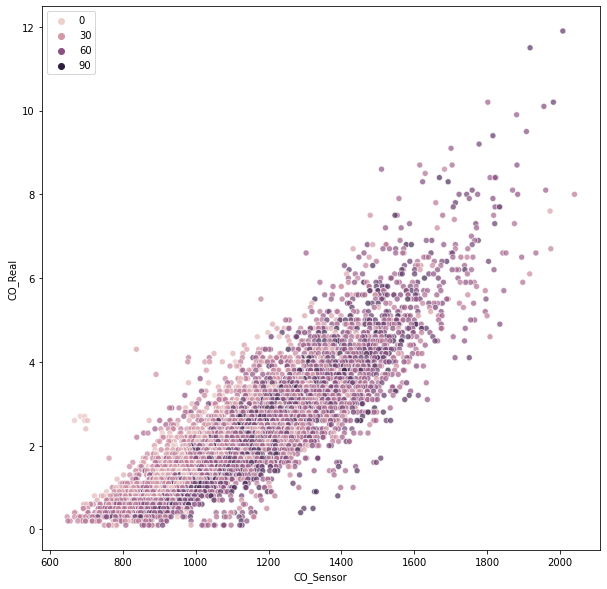

In [21]:
#Plotting Real data vs Sensor data for CO compound
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, x="CO_Sensor", y="CO_Real", alpha=0.7, hue=df['Relative Humidity'].to_list());
                


There is high linear relationship between CO_Real and CO_Sensor

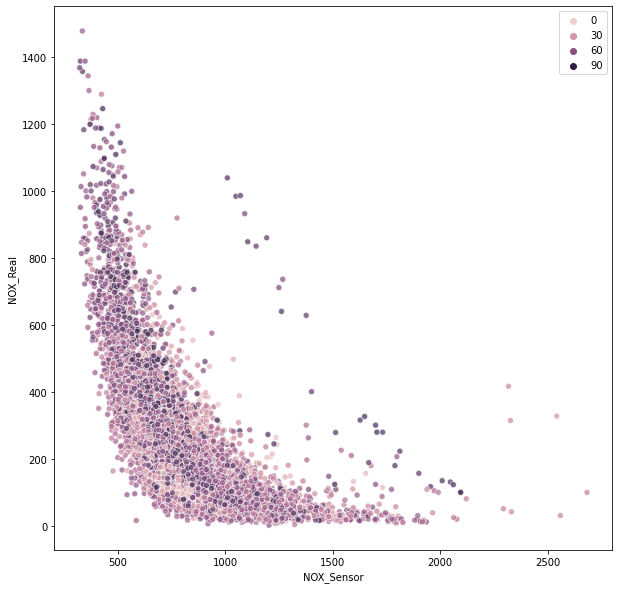

In [22]:
#Plotting Real data vs Sensor data for NOX compound

plt.figure(figsize=(10,10))

sns.scatterplot(data=df, x="NOX_Sensor", y="NOX_Real", alpha=0.7,hue=df['Relative Humidity'].to_list());


The outliers and points which are not in the line of Real and sensor amounts, have high relative humidity.

It is hard to understand relationship between NOX_Real and NOX_Sensor. There are some points above 1300 for NOX_sensor which in NOX_Real are around Zero. These points cause non-linearity in the relationship.

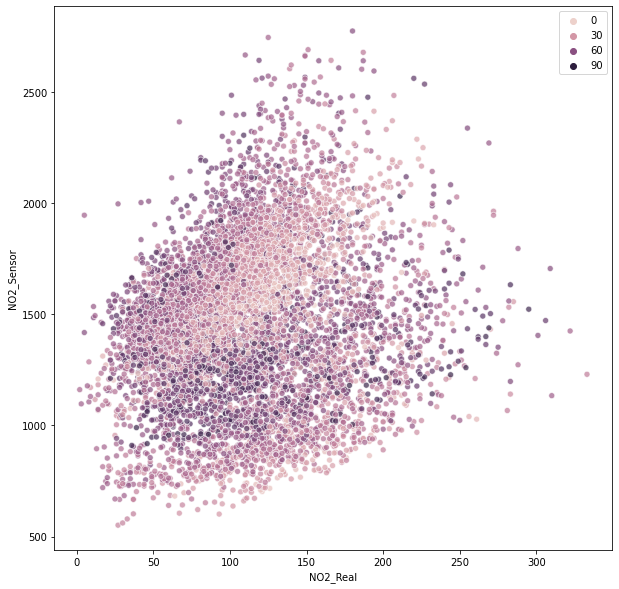

In [23]:
#Plotting Real data vs Sensor data for NO2 compound
plt.figure(figsize=(10,10))

sns.scatterplot(data=df, x="NO2_Real", y="NO2_Sensor", alpha=0.7,hue=df['Relative Humidity'].to_list());


The data are all over the graph. No relationship was observed.

The data distribution looks closer to normal distribution after removing outliers.

In [24]:
datapath = 'Desktop/Springboard/Capstone 2'
if not os.path.exists(datapath):
    os.mkdir(datapath)

In [25]:
datapath_Air_Quality = os.path.join(datapath, 'Wrangledata.csv')
if not os.path.exists(datapath_Air_Quality):
    df.to_csv(datapath_Air_Quality, index=False)

## Summary:
The invalid data were replaced with Nan values. After cleaning columns names, data distributions were investigated. The distributions did not show outlier datapoints. Categorical variables seems clean. Plotting sensor vs real values show some kind of linear relationship between sensor and true values for the CO but it's hard to understand sensor and true values relationship for NOX and NO2. We will explore them more in the EDA step.